<a href="https://colab.research.google.com/github/LonelyFriday/CNNs_vs_ANNs_MNIST/blob/main/CNN_vs_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
# import library
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from keras.datasets import mnist

from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# show dimension
print(f"X_train shape = {X_train.shape} | y_train shape = {y_train.shape}".format(X_train, y_train))
print(f"X_train shape = {X_test.shape} | y_test shape = {y_test.shape}".format(X_test, y_test))

11490434/11490434 [==============================] - 0s 0us/step
X_train shape = (60000, 28, 28) | y_train shape = (60000,)
X_train shape = (10000, 28, 28) | y_test shape = (10000,)


#EDA

contain these number = [0 1 2 3 4 5 6 7 8 9]


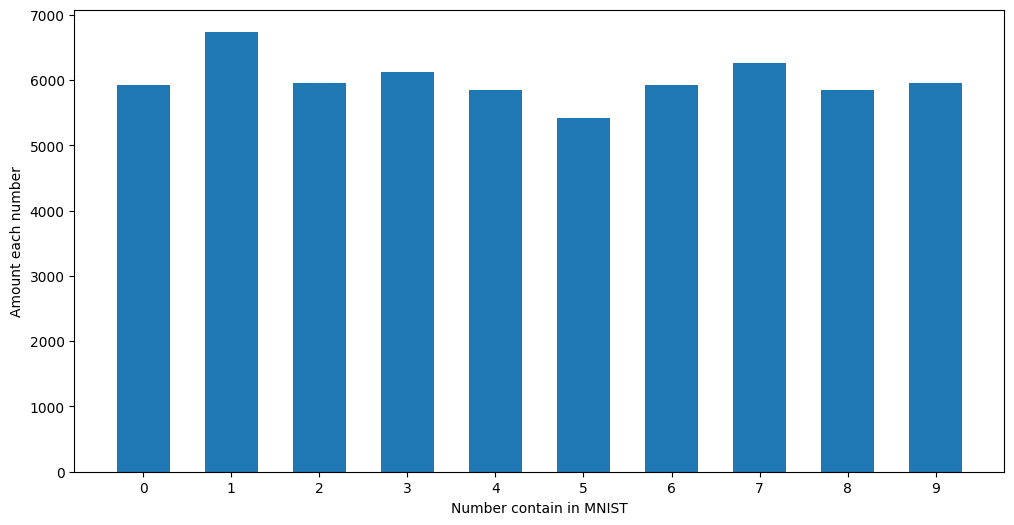

In [3]:
# MNIST characteritics
# show value in MNIST data
unique_num=np.unique(y_train)
print(f"contain these number = {unique_num}".format(unique_num))

plt.figure(figsize=(12, 6))

# show each categories
plt.hist(y_train, rwidth=0.6, bins=np.arange(min(y_train) - 0.5, max(y_train) + 0.6, 1))
plt.xticks(np.arange(min(y_train), max(y_train)+1))
plt.xlabel("Number contain in MNIST")
plt.ylabel("Amount each number")
plt.show()

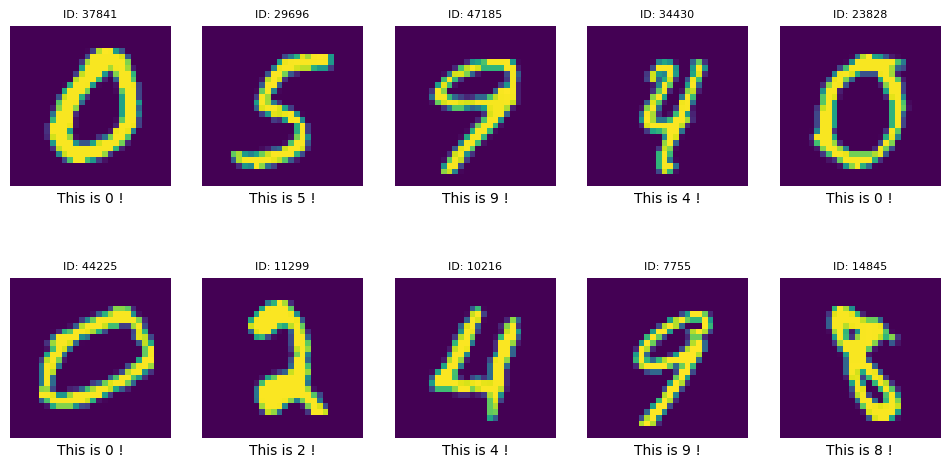

In [4]:
# random plot 10 image from training data

plt.figure(figsize=(12, 6))

for index in range(0, 10):
  random_index = np.random.randint(len(X_train))
  plt.subplot(2, 5, index+1)
  plt.imshow(X_train[random_index])
  plt.title(f"ID: {random_index}".format(random_index=random_index), fontsize=8)
  plt.text(0.5, -0.1, f"This is {y_train[random_index]} !".format(y_train=y_train), fontsize=10, ha='center', transform=plt.gca().transAxes)
  plt.axis('off')

#CNN and ANN model

In [5]:
# Define the CNN architecture
cnn_model = models.Sequential([
    # Convolutional layer with 32 filters, each of size (3, 3), and 'relu' activation function
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # MaxPooling layer with pool size (2, 2)
    layers.MaxPooling2D((2, 2)),
    # Flatten the output from the previous layer
    layers.Flatten(),
    # Fully connected layer with 128 units and 'relu' activation function
    layers.Dense(128, activation='relu'),
    # Output layer with 10 units (number of classes) and 'softmax' activation function
    layers.Dense(10, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary to see the architecture and number of trainable parameters
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [6]:
# Define the ANN architecture
ann_model = models.Sequential([
    # Flatten the input image from (28, 28, 1) to a 1D array of size 28*28=784
    layers.Flatten(input_shape=(28, 28, 1)),
    # Fully connected layer with 128 units and 'relu' activation function
    layers.Dense(32, activation='relu'),
    layers.Dense(128, activation='relu'),
    # Output layer with 10 units (number of classes) and 'softmax' activation function
    layers.Dense(10, activation='softmax')
])

# Compile the model
ann_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary to see the architecture and number of trainable parameters
ann_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 128)               4224      
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 30,634
Trainable params: 30,634
Non-trainable params: 0
_________________________________________________________________


In [7]:
# train each model 5 times by use 10% of train data as validation data
history_cnn = cnn_model.fit(X_train, y_train, validation_split=0.1, epochs=10)
history_ann = ann_model.fit(X_train, y_train, validation_split=0.1,epochs=10)

Epoch 1/10
1688/1688 [==============================] - 19s 4ms/step - loss: 0.4869 - accuracy: 0.9300 - val_loss: 0.0879 - val_accuracy: 0.9750
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0818 - accuracy: 0.9757 - val_loss: 0.0749 - val_accuracy: 0.9783
Epoch 3/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0540 - accuracy: 0.9835 - val_loss: 0.0801 - val_accuracy: 0.9790
Epoch 4/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0441 - accuracy: 0.9863 - val_loss: 0.0725 - val_accuracy: 0.9817
Epoch 5/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0345 - accuracy: 0.9893 - val_loss: 0.0772 - val_accuracy: 0.9823
Epoch 6/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0286 - accuracy: 0.9907 - val_loss: 0.0918 - val_accuracy: 0.9815
Epoch 7/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0284 - accuracy: 0.9914 - val_loss: 0.0985 - val_accuracy

<ipython-input-9-9252d4fe2638>:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # To avoid overlapping of subplots and adjust spacing


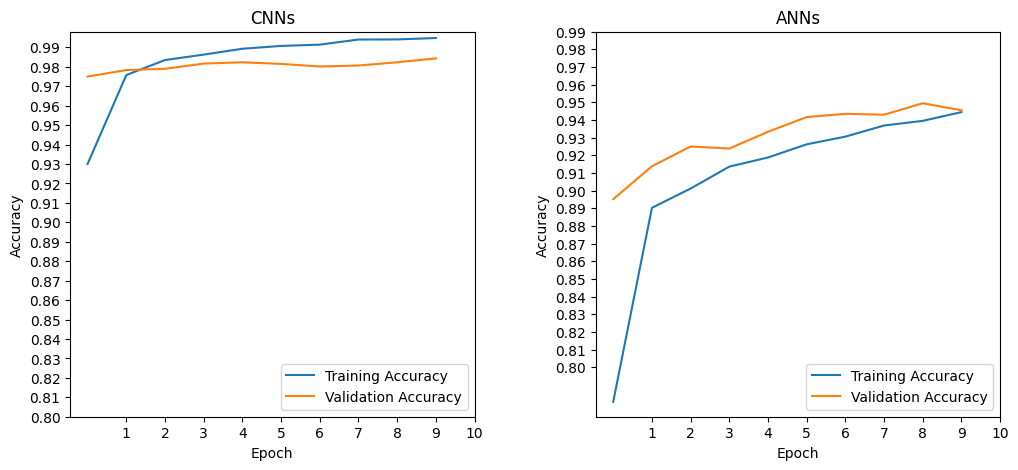

In [9]:
# Create a figure with two subplots (1 row, 2 columns) and add space between them
fig, axs = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'wspace': 0.3})

# Plot the training accuracy in the first subplot
axs[0].plot(history_cnn.history['accuracy'], label='Training Accuracy')
axs[0].plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('CNNs')
axs[0].set_xticks(range(1, 11))  # Set the x-ticks from 1 to 5
axs[0].legend(loc='lower right')

# Plot the validation accuracy in the second subplot
axs[1].plot(history_ann.history['accuracy'], label='Training Accuracy')
axs[1].plot(history_ann.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('ANNs')
axs[1].set_xticks(range(1, 11))  # Set the x-ticks from 1 to 5
axs[1].legend(loc='lower right')

# Set the y-ticks to be the same in both plots (from 0.90 to 0.99 with a step of 0.01)
yticks = [0.80 + i * 0.01 for i in range(20)]
axs[0].set_yticks(yticks)
axs[1].set_yticks(yticks)

plt.tight_layout()  # To avoid overlapping of subplots and adjust spacing
plt.show()

#Random show performance of both model

In [31]:
# predict X_test with both model
predict_cnn = cnn_model.predict(X_test).argmax(axis=-1)
predict_ann = ann_model.predict(X_test).argmax(axis=-1)

313/313 [==============================] - 1s 1ms/step


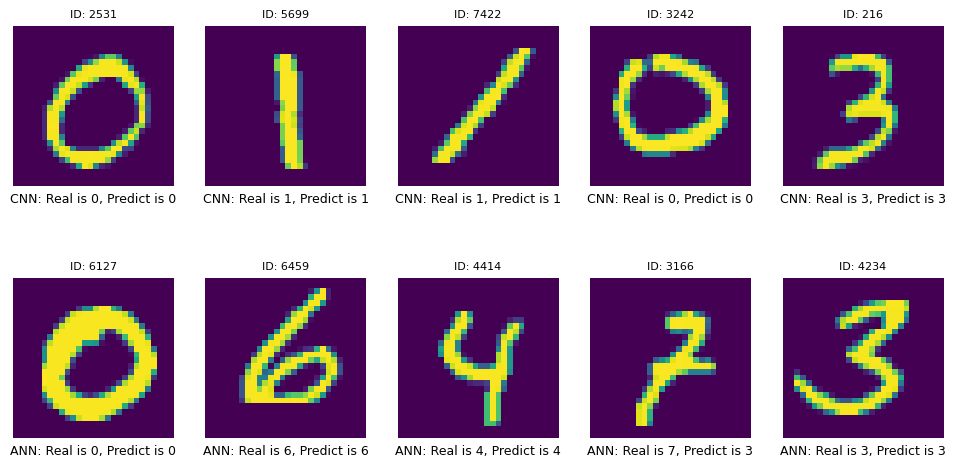

In [46]:
# random plot 5 testing data by CNN in 1st row
# and ANN in 2nd row

plt.figure(figsize=(12, 6))

for index in range(0, 5):
  random_index = np.random.randint(len(X_test))
  plt.subplot(2, 5, index+1)
  plt.imshow(X_test[random_index])
  plt.title(f"ID: {random_index}".format(random_index=random_index), fontsize=8)
  plt.text(0.5, -0.1, f"CNN: Real is {y_test[random_index]}, Predict is {predict_cnn[random_index]}".format(y_test=y_test, predict_cnn=predict_cnn), fontsize=9, ha='center', transform=plt.gca().transAxes)
  plt.axis('off')

for index in range(0, 5):
  random_index = np.random.randint(len(X_test))
  plt.subplot(2, 5, index+6)
  plt.imshow(X_test[random_index])
  plt.title(f"ID: {random_index}".format(random_index=random_index), fontsize=8)
  plt.text(0.5, -0.1, f"ANN: Real is {y_test[random_index]}, Predict is {predict_ann[random_index]}".format(y_test=y_test, predict_ann=predict_ann), fontsize=9, ha='center', transform=plt.gca().transAxes)
  plt.axis('off')

plt.show()

#Conclusion

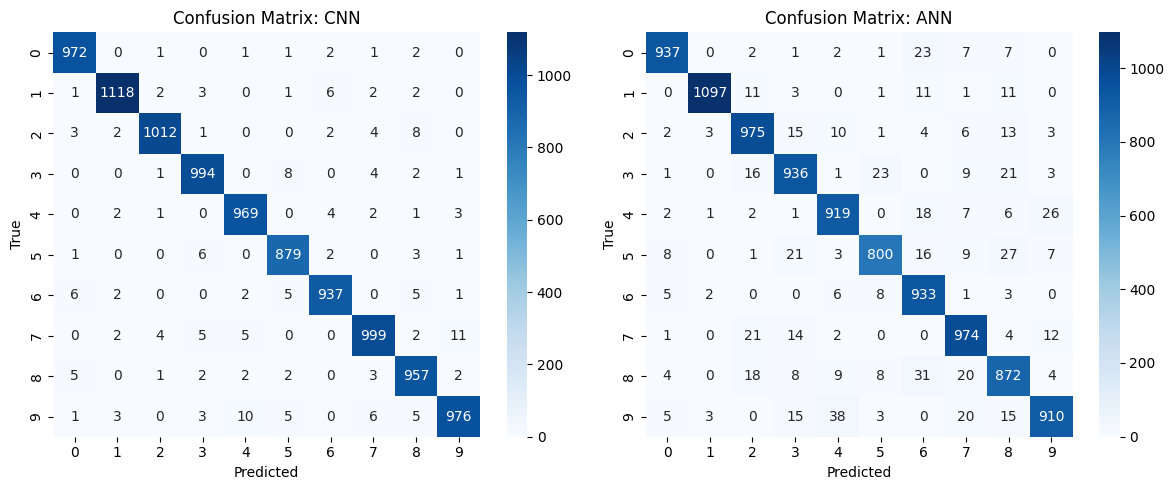

In [50]:
# Assuming you have 'y_test', 'predict_cnn', and 'predict_ann' (from the previous code)

# Calculate the confusion matrices
cm_cnn = confusion_matrix(y_test, predict_cnn)
cm_ann = confusion_matrix(y_test, predict_ann)

# Create a figure with two subplots in a single row
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first confusion matrix in the first subplot
sns.heatmap(cm_cnn, annot=True, fmt="d", cmap="Blues", ax=axs[0])
axs[0].set_title("Confusion Matrix: CNN")
axs[0].set_xlabel("Predicted")
axs[0].set_ylabel("True")

# Plot the second confusion matrix in the second subplot
sns.heatmap(cm_ann, annot=True, fmt="d", cmap="Blues", ax=axs[1])
axs[1].set_title("Confusion Matrix: ANN")
axs[1].set_xlabel("Predicted")
axs[1].set_ylabel("True")

plt.tight_layout()  # To avoid overlapping of subplots
plt.show()


In [60]:
# Calculate accuracy, precision, recall, and F1-score using classification_report
report_cnn = classification_report(y_test, predict_cnn)
report_ann = classification_report(y_test, predict_ann)

print("CNN:", report_cnn, sep="\n")
print("ANN:", report_ann, sep="\n")

CNN:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.99      0.98       982
           5       0.98      0.99      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

ANN:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       980
           1       0.99      0.97      0.98      1135
           2       0.93      0.94      0.94      1032
           3  